In [2]:
%load_ext autoreload
%autoreload 2

# Linear machine

Set a seed for reproducibility:

In [3]:
SEED = 42

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(SEED)

## Hyperplane separation

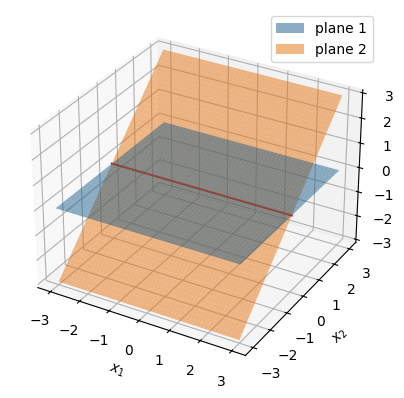

In [5]:
x = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, x)

# plane 1
w1 = np.array([0, 0])
b1 = 0
surf1 = x1 * w1[0] + x2 * w1[1] + b1

# plane 2
w2 = np.array([0, 1])
b2 = 0
surf2 = x1 * w2[0] + x2 * w2[1] + b2

# intersection line
w_inter = w1 - w2
b_inter = b1 - b2
x1_inter = np.array([x[0], x[-1]])
x2_inter = - (w_inter[0] * x1_inter + b_inter) / w_inter[1]
z_inter = x1_inter * w1[0] + x2_inter * w1[1] + b1

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x1, x2, surf1, alpha=0.5, label="plane 1")
ax.plot_surface(x1, x2, surf2, alpha=0.5, label="plane 2")
ax.plot(x1_inter, x2_inter, np.zeros_like(x1_inter), color="red")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$z$")

ax.legend()
plt.show()

## Linear machine model 

A linear machine is a classifier that separates classes using hyperplanes. It can used for multi-class classification. The formulation of the linear machine is given by:

$$
\hat{y}_i = g_i(\mathbf{x}) = \mathbf{w}_i \cdot \mathbf{x} = \mathbf{w}_i^T \mathbf{x},
$$

where $g_i$ is the discriminative function for class $i$ and $\mathbf{w}_i$ is the weight vector for class $i$.

Considering $k$ classes and $d$-dimensional input vectors, we can organize the weights in a matrix $\mathbf{W}_{d\times k} = [\mathbf{w}_1, \mathbf{w}_2, \ldots, \mathbf{w}_k]$, and the input vectors in a matrix $\mathbf{X}_{n\times d} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n]$, where the first row is the bias term. The output of the linear machine is given by:

$$
\mathbf{\hat{Y}}_{n\times k} = \mathbf{X}_{n\times d} \mathbf{W}_{{d\times k}},
$$

where the $\hat{y}_{ji}$ entry is the predicted value for the $j$-th input and the $i$-th class.

Train set size: 800
Test set size: 200
X_train_min: -2.7006378421518584, X_train_max: 3.056834530918784
ymin: 0, ymax: 2


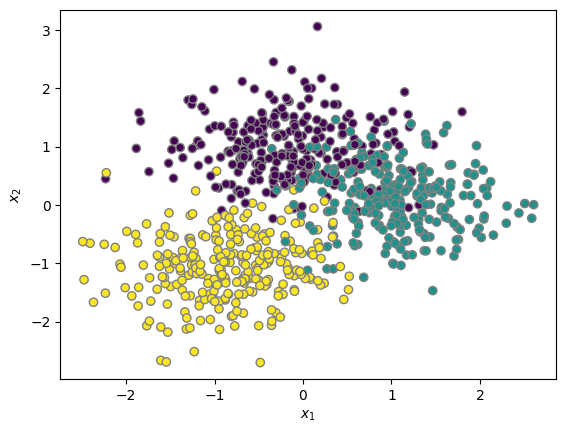

In [6]:
from utils import make_classification_dataset, standard_scaler
from sklearn.model_selection import train_test_split


num_classes = 3  # number
X, y = make_classification_dataset(1000, 2, num_classes, cluster_std=4)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Standardize X
X_train, mean, std = standard_scaler(X_train)
X_test, _, _ = standard_scaler(X_test, mean, std)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="gray")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

print(f"X_train_min: {X_train.min()}, X_train_max: {X_train.max()}")

print(f"ymin: {y.min()}, ymax: {y.max()}")

In [7]:
import numpy as np
W = np.random.randn(2, 3) # d=2 features, k=3 classes
Y = np.dot(X_train, W) # (n, d) * (d, k) = (n, k)
print(Y.shape)
print(Y[:5])

(800, 3)
[[ 1.11243256 -1.73325697 -1.41821624]
 [ 0.73562113 -1.4328706  -0.69351859]
 [ 0.0590233  -0.36553246  0.15785989]
 [-0.70225839  1.57540554  0.48523831]
 [-0.26700516  0.56169937  0.21626201]]


### One-hot encoding

The one-hot encoding is a binary representation of the classes. For example, if we have three classes, the one-hot encoding is given by:

$$
\begin{aligned}
\text{Class 1} & : [1, 0, 0], \\
\text{Class 2} & : [0, 1, 0], \\
\text{Class 3} & : [0, 0, 1].
\end{aligned}
$$

For a dataset with $n$ samples and $c$ classes, the one-hot encoding is given by a matrix $\mathbf{Y}_{n\times c}$, where each row is the one-hot encoding of the class of the sample. This representation is used to convert the labels to the output format of the linear machine.

In [8]:
def onehot(y, n_classes):
    """
    Convert integer labels to one-hot encoding.
    """
    return np.eye(n_classes)[y]


Y_train_onehot = onehot(y_train, 3)
Y_test_onehot = onehot(y_test, 3)

print(y_train[:5])
print(Y_train_onehot[:5])

[0 0 1 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


## Pseudo-inverse solution for the linear machine

The solution for the linear machine can be obtained using the pseudo-inverse of the input matrix. The pseudo-inverse is a generalization of the matrix inverse for non-square matrices. The pseudo-inverse of a matrix $\mathbf{X}$ is given by:

$$
\mathbf{X}^+ = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T.
$$

Based on the linear machine model $\mathbf{Y} = \mathbf{X} \mathbf{W}$, the weights of the linear machine can be obtained using the pseudo-inverse of the input matrix:

$$
\mathbf{W} = \mathbf{X}^+ \mathbf{Y},
$$

where $\mathbf{X}^+$ is the pseudo-inverse of $\mathbf{X}$.

In [9]:
# pseudo inverse of X
X_pinv = np.linalg.pinv(X_train)
W = np.dot(X_pinv, Y_train_onehot)
print(W.shape) # d=2 features, k=3 classes

(2, 3)


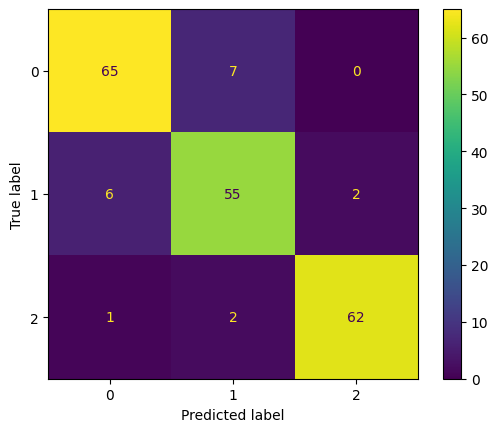


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        72
           1       0.86      0.87      0.87        63
           2       0.97      0.95      0.96        65

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

[1 0 0 0 2 1 0 2 2 1 0 1 1 2 1 0 2 2 1 1 0 0 2 2 2 1 2 0 1 1 0 1 0 2 1 0 1
 1 1 1 2 2 2 1 1 0 1 2 0 0 1 0 2 0 2 2 0 2 2 0 0 1 0 0 0 0 2 1 0 2 0 1 2 2
 0 0 0 2 1 2 0 2 1 1 1 2 1 0 2 2 0 0 2 0 2 0 2 1 0 1 2 2 0 0 1 1 2 0 1 0 0
 1 2 0 0 2 1 2 0 1 1 1 2 1 2 1 2 0 0 1 0 1 0 1 1 0 2 1 0 2 1 2 1 1 0 0 1 2
 0 1 2 2 0 1 0 0 2 2 2 0 2 0 0 2 2 2 1 0 1 2 2 0 1 1 0 0 0 1 1 1 1 1 2 1 0
 0 0 1 2 2 0 2 0 2 1 2 0 2 0 0]
[[-0.05982878  0.30705122 -0.24722244]
 [ 0.60947973 -0.52003025 -0.08944948]
 [ 0.53410314 -0.33670595 -0.19739719]
 [ 0.27219654 -0.42008231  0.14788576]
 [-0.2579035  -0.36094008  0.618

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Y_pred_onehot = np.dot(X_test, W)
y_pred = np.argmax(Y_pred_onehot, axis=1) # max index along axis 1 (columns)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

print(y_pred)
print(Y_pred_onehot[:5])